In [1]:
%matplotlib notebook
import netCDF4 as nc
import numpy as np
import xie_liu as xl
import matplotlib.pyplot as plt

In [2]:
root = nc.Dataset("dados/maoradflux1long/maoradflux1longM1.c2.20140223.040000.nc", "r")

In [3]:
root["base_time"][:]

array(1393113600, dtype=int32)

In [23]:
root

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: ARM-1.1
    command_line: radflux1long_vap -s mao -f M1 -b 20131220 -e 20151201 -n radflux1longc2 require_goodday 0 -D 2
    process_version: vap-radflux1long-2.3-0.el6
    dod_version: radflux1long-c2-1.4
    site_id: mao
    facility_id: M1
    platform_id: radflux1long
    location_description: Green Ocean Amazon (GOAMAZON), Manacapuru, Amazonia, Brazil
    data_level: c2
    rh_factor_flag: 1
    rh_factor_flag_comment: 0 = no_coef_applied 1 = calculate_coef 2 = use_std_coef 3 = use_coef_from_prev_run
    fitmode: 0
    fitmode_comment: 01 = daily_fit 00 =  1_fit
    input_datastreams: maoqcrad1longM1.c2 : 0.5 : 20131220.000000-20151201.000000
    datastream: maoradflux1longM1.c2
    doi: 10.5439/1157585
    history: created by user gaustad on machine amber at 2016-03-18 19:56:26, using vap-radflux1long-2.3-0.el6
    dimensions(sizes): time(1440), bound(2)
    variables

In [4]:
root["time_offset"]

<class 'netCDF4._netCDF4.Variable'>
float64 time_offset(time)
    long_name: Time offset from base_time
    units: seconds since 2014-02-23 00:00:00 0:00
    ancillary_variables: base_time
unlimited dimensions: time
current shape = (1440,)
filling off

In [5]:
root

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: ARM-1.1
    command_line: radflux1long_vap -s mao -f M1 -b 20131220 -e 20151201 -n radflux1longc2 require_goodday 0 -D 2
    process_version: vap-radflux1long-2.3-0.el6
    dod_version: radflux1long-c2-1.4
    site_id: mao
    facility_id: M1
    platform_id: radflux1long
    location_description: Green Ocean Amazon (GOAMAZON), Manacapuru, Amazonia, Brazil
    data_level: c2
    rh_factor_flag: 1
    rh_factor_flag_comment: 0 = no_coef_applied 1 = calculate_coef 2 = use_std_coef 3 = use_coef_from_prev_run
    fitmode: 0
    fitmode_comment: 01 = daily_fit 00 =  1_fit
    input_datastreams: maoqcrad1longM1.c2 : 0.5 : 20131220.000000-20151201.000000
    datastream: maoradflux1longM1.c2
    doi: 10.5439/1157585
    history: created by user gaustad on machine amber at 2016-03-18 19:56:26, using vap-radflux1long-2.3-0.el6
    dimensions(sizes): time(1440), bound(2)
    variables

In [6]:
root["clearsky_downwelling_longwave"]

<class 'netCDF4._netCDF4.Variable'>
float32 clearsky_downwelling_longwave(time)
    long_name: Estimated clear-sky downwelling longwave irradiance
    units: W/m^2
    missing_value: -9999.0
    standard_name: surface_downwelling_longwave_flux_in_air_assuming_clear_sky
    cell_methods: time: mean
unlimited dimensions: time
current shape = (1440,)
filling off

In [30]:
    dataset = root
    cf = dataset["cloudfraction_longwave"][:]
    base_time = dataset["base_time"][0]
    time_offset = dataset["time_offset"][:]
    Fdn_clr = dataset["direct_downwelling_shortwave"][:]
    Fdn_all = dataset["downwelling_shortwave"][:]
    Fup_all = dataset["upwelling_shortwave"][:]
    Fdn_clr_d = dataset["clearsky_diffuse_downwelling_shortwave"][:]
    Fdn_all_d = dataset["direct_downwelling_shortwave"][:]
    T = dataset["cloud_transmissivity_shortwave"][:]

In [31]:
Fdn_clr_d[5]

0.0

In [32]:
(np.max(time_offset) - np.min(time_offset)) / (60 * 60)

23.983333333333334

x = np.linspace(0, 500, 1e5)
y = x
plt.plot(x, y, '-r')
plt.plot(Fdn_clr_d, Fdn_all_d, '.')
plt.xlim((0, 150))
plt.xlabel("clear")
plt.ylabel("all")
plt.show()

In [33]:
(B1, B2) = xl.get_B(Fdn_clr, Fdn_all, Fup_all, Fdn_clr_d, Fdn_all_d, T)

In [34]:
cf[:]

array([ 0.63,  0.63,  0.63, ...,  0.63,  0.63,  0.63], dtype=float32)

<IPython.core.display.Javascript object>


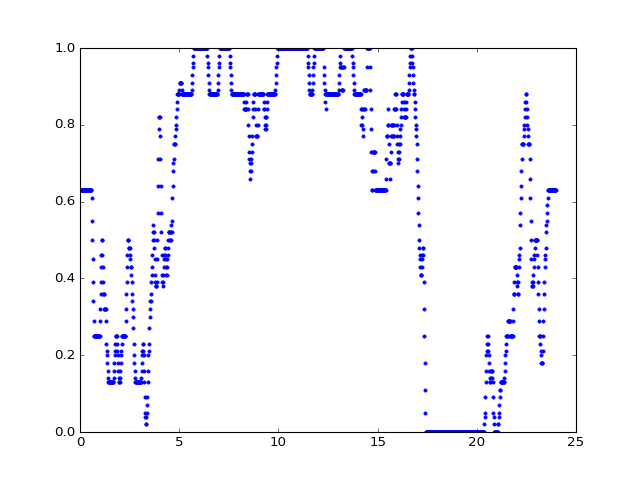

In [37]:
plt.plot((time_offset - time_offset[0]) / (60*60), cf, '.')
plt.show()

In [12]:
m = T

In [13]:
len(m[m < 0])

762

In [14]:
np.min(m)

0.059999999

In [15]:
np.mean(m)

0.33264011619365319

In [16]:
np.max(m)

1.02